In [22]:
import networkx as nx
import matplotlib.pyplot as plt

In [64]:
with open("inputs/test05", "r") as f:
  input = f.read()

ordering_rules = [list(map(int, rule.split("|"))) for rule in input.split("\n\n")[0].split("\n")]
page_updates =[list(map(int, list(filter(None, update.split(","))))) for update in input.split("\n\n")[1].split("\n")][:-1]
page_updates = list(map(lambda l: ["source"]+l+["sink"], page_updates))

In [44]:
graph = nx.DiGraph()
graph.add_edges_from(ordering_rules)
graph.add_nodes_from(["sink", "source"])

for n in graph.nodes():
    if n in ["sink", "source"]:
        continue
    graph.add_edge(n, "sink")
    graph.add_edge("source", n)

In [ ]:
def find_path_with_nodes(graph, nodes_to_visit):

    # Build the complete path
    path = []
    for i in range(len(nodes_to_visit) - 1):
        try:
            # Find shortest path between consecutive nodes in nodes_to_visit
            sub_path = nx.shortest_path(graph, source=nodes_to_visit[i], target=nodes_to_visit[i + 1])

            # Avoid duplicating nodes while merging paths
            if path:
                path.extend(sub_path[1:])
            else:
                path.extend(sub_path)
        except nx.NetworkXNoPath:
            return None  # No path exists between consecutive nodes

    return path

In [ ]:
sum = 0
for x in page_updates:
    res = find_path_with_nodes(graph, x)
    if res != None:
        sum += res[(len(res)-1)/2]

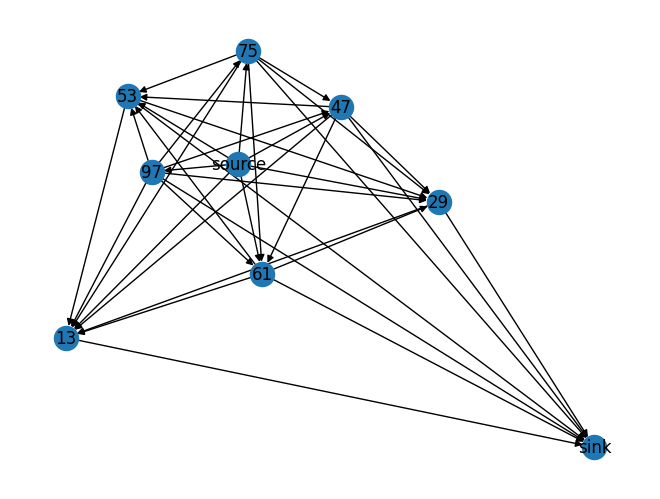

In [45]:
nx.draw(graph, with_labels=True)